# Performance Skyline
The perfomance skyline of a trace contains only the events in the dominant path.

More info in [Performance Skyline: Inferring Process Performance Models from Interval Events Paper](https://www.springerprofessional.de/en/performance-skyline-inferring-process-performance-models-from-in/19021296)

In [1]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import importlib

In [5]:
print(os.getcwd())
import sys
sys.path.append(os.getcwd()+'/../perfSky')
#sys.path.append('/Users/andreamaldonado/git_tree/perfSky/perfSky')

from Skyline import get_relative_timestamps, get_skyline_points, get_average_trace, get_skyline_activity_set
import Visualizer as pt

/Users/andreamaldonado/git_tree/perfSky/notebooks


ImportError: cannot import name 'get_skyline_activity_set' from 'perfSky.Skyline' (/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/site-packages/perfSky/Skyline.py)

In [6]:
ACTIVITY_ID='common_act'

#df = pd.read_csv("../data/daily.2019-July_September.csv")
df = pd.read_csv("../data/clustered_agg_edit_75_daily.csv", sep=";")
#df = df[['case', 'activity', 'start_time', 'end_time','cluster_id']]
#df['start_time']=df['start_time'].apply(lambda x: x.split('+')[0])
#df['end_time']=df['end_time'].apply(lambda x: x.split('+')[0])
df['activity_original'] = df['activity']
df['activity']=df[ACTIVITY_ID]
df.head()

excluding = get_relative_timestamps(df, ['AllTasks']) #'AllTasks' is one entry per log with its overall duration


print('Data set contains:')
print('- ',len(excluding),'events')
print('- ',len(excluding['case'].unique()),'cases')
print('- ',len(excluding['activity'].unique()),'activities')
#print('- ',len(excluding['cluster_id'].unique()),' clustered activities')

sample = excluding[excluding['case'].isin(excluding['case'].unique()[:5])]
excluding.head()

Grouped: 61864 columns ['case', 'activity', 'start_time', 'end_time', 'cluster_id', 'common_act', 'activity_original', 'zero_point']
Merged relatived: 61930 columns ['case', 'activity', 'start_time', 'end_time', 'cluster_id_x', 'common_act_x', 'activity_original_x', 'zero_point', 'cluster_id_y', 'common_act_y', 'activity_original_y']
Data set contains:
-  61930 events
-  50 cases
-  75 activities


case  \
221  daily.2019-07-01_10-28-01   
222  daily.2019-07-01_10-28-01   
223  daily.2019-07-01_10-28-01   
224  daily.2019-07-01_10-28-01   
225  daily.2019-07-01_10-28-01   

                                              activity rel_start  rel_end  \
221                          DumpTask(sql_filename=_11   0:00:00  0:04:52   
222  DumpTask(sql_filename=reprocess_urls)(kvs=None...   0:00:00  0:01:43   
223                          DumpTask(sql_filename=_11   0:00:00  1:02:58   
224                                  ProxySetupTask_16   0:00:00  0:13:17   
225                                   CrawlFeedTask_61   0:00:00  0:17:10   

     num_start  num_end           start_time             end_time  
221        0.0    292.0  2019-07-01 10:41:26  2019-07-01 10:46:18  
222        0.0    103.0  2019-07-01 10:41:26  2019-07-01 10:43:09  
223        0.0   3778.0  2019-07-01 10:41:26  2019-07-01 11:44:24  
224        0.0    797.0  2019-07-01 10:41:26  2019-07-01 10:54:43  
225        0.0   1030.0  2019-07-01 10:41:26  2019-07-01 10:58:36

In [8]:
excluding = get_relative_timestamps(sample, ['AllTasks']) #'AllTasks' is one entry per log with its overall duration

print('Data set contains:')
print('- ',len(excluding),'events')
print('- ',len(excluding['case'].unique()),'cases')
print('- ',len(excluding['activity'].unique()),'activities')

excluding.head()

Grouped: 6241 columns ['case', 'activity', 'rel_start', 'rel_end', 'num_start', 'num_end', 'start_time', 'end_time', 'zero_point']
Merged relatived: 6265 columns ['case', 'activity', 'rel_start_x', 'rel_end_x', 'num_start_x', 'num_end_x', 'start_time', 'end_time', 'zero_point', 'rel_start_y', 'rel_end_y', 'num_start_y', 'num_end_y']
Data set contains:
-  6265 events
-  5 cases
-  70 activities


case  \
0   daily.2019-07-01_10-28-01   
21  daily.2019-07-01_10-28-01   
22  daily.2019-07-01_10-28-01   
23  daily.2019-07-01_10-28-01   
24  daily.2019-07-01_10-28-01   

                                             activity rel_start  rel_end  \
0                           DumpTask(sql_filename=_11   0:00:00  0:04:52   
21                                   CrawlFeedTask_61   0:00:00  0:17:10   
22                                  ProxySetupTask_16   0:00:00  0:13:17   
23                          DumpTask(sql_filename=_11   0:00:00  1:02:58   
24  DumpTask(sql_filename=reprocess_urls)(kvs=None...   0:00:00  0:01:43   

    num_start  num_end           start_time             end_time  
0         0.0    292.0  2019-07-01 10:41:26  2019-07-01 10:46:18  
21        0.0   1030.0  2019-07-01 10:41:26  2019-07-01 10:58:36  
22        0.0    797.0  2019-07-01 10:41:26  2019-07-01 10:54:43  
23        0.0   3778.0  2019-07-01 10:41:26  2019-07-01 11:44:24  
24        0.0    103.0  2019-07-01 10:41:26  2019-07-01 10:43:09

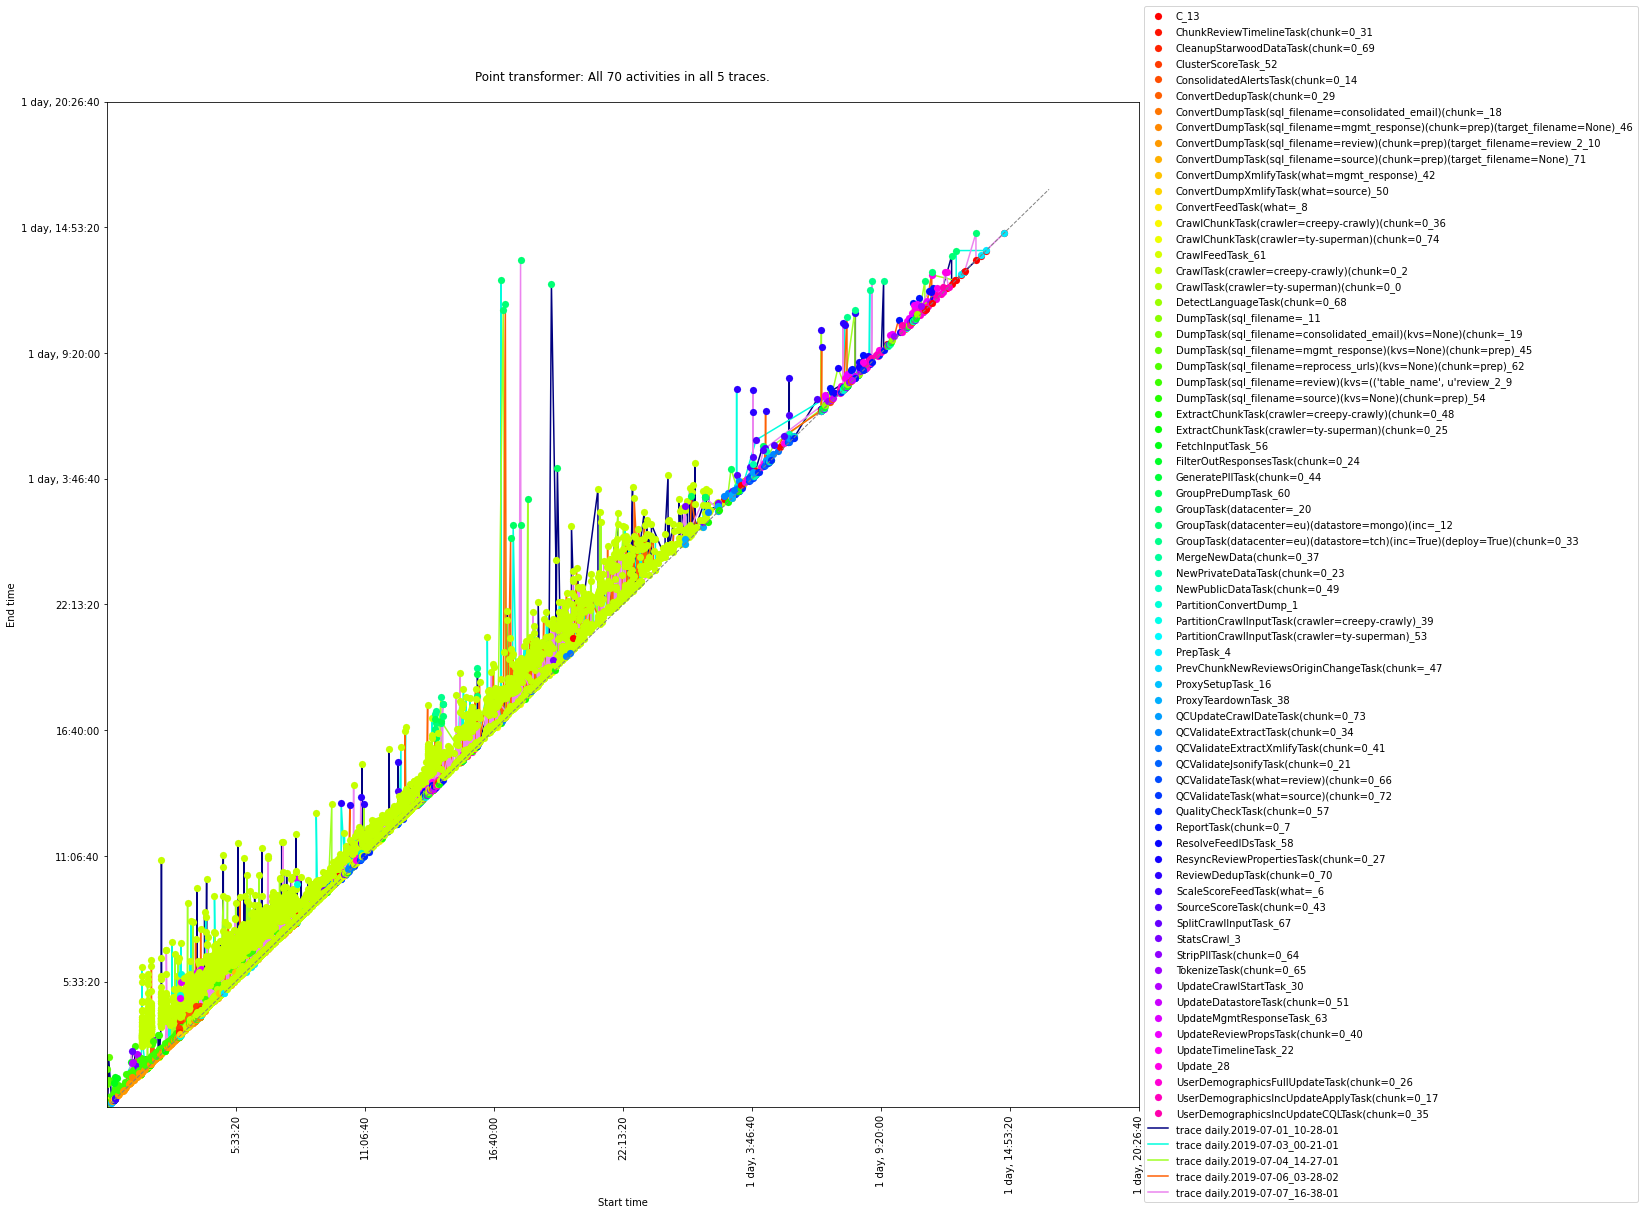

In [10]:
vis.plot_all_traces(sample, show_plot=None)

<AxesSubplot:ylabel='Frequency'>

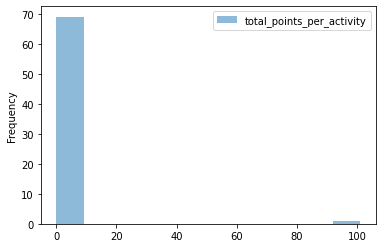

In [11]:
all_by_activity = excluding.groupby('activity').size().reset_index(name='total_points_per_activity').sort_values(by=['total_points_per_activity'], ascending=False)
all_by_activity['total_points_per_activity']=all_by_activity.apply(lambda row: round(row['total_points_per_activity']/50), axis=1)
all_by_activity.plot.hist(bins=11, alpha=0.5)

Frequency of activities having more than 1 event per activity  3 

                                             activity  \
16         CrawlTask(crawler=creepy-crawly)(chunk=0_2   
8   ConvertDumpTask(sql_filename=review)(chunk=pre...   
23  DumpTask(sql_filename=review)(kvs=(('table_nam...   

    total_points_per_activity  
16                        101  
8                           4  
23                          4  


<AxesSubplot:ylabel='Frequency'>

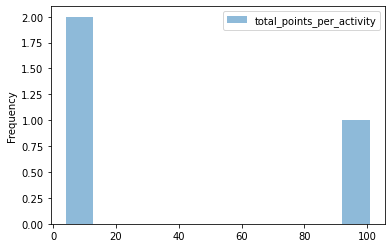

In [12]:
print('Frequency of activities having more than 1 event per activity ',len(all_by_activity[all_by_activity['total_points_per_activity']>1]), '\n')
print(all_by_activity[all_by_activity['total_points_per_activity']>1])
all_by_activity[all_by_activity['total_points_per_activity']>1].plot.hist(bins=11, alpha=0.5)

[autoreload of Visualizer failed: Traceback (most recent call last):
  File "/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 455, in superreload
    module = reload(module)
  File "/Users/andreamaldonado/miniconda3/envs/py39/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/andreamaldonado/git_tree/perfSky/notebooks/../perfSky/Visualizer.py", line 13, in <module>
    from perfSky.Skyline import get_relative_timestamps, get_duration, get_average_trace, get_skyline_points, get_activit

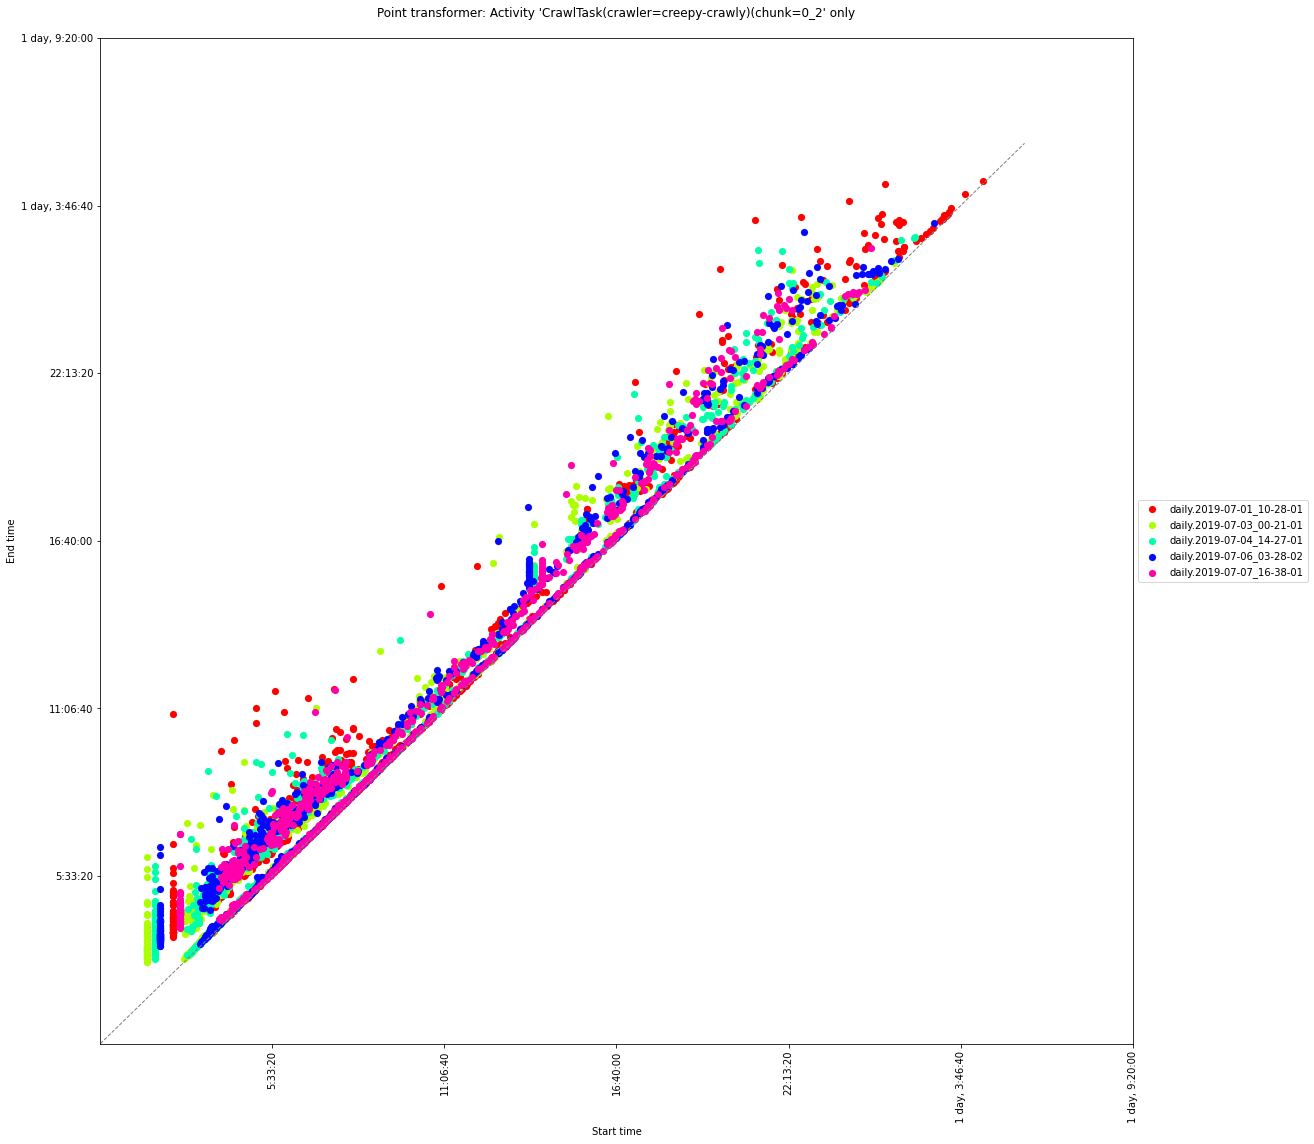

In [13]:
vis.plot_selected_activities(sample[sample['activity']=='CrawlTask(crawler=creepy-crawly)(chunk=0_2'], show_plot=1)

## Compute average trace
Average skyline contains a point per activity, depicting the average start and average end timestamps of it.

In [14]:
average_trace_activities = vis.get_data_selection_avgtrace(vis.get_relative_timestamps(excluding)).sort_values(by=['num_start'])
print('Average trace over activities has',len(average_trace_activities),'events')
average_trace_activities.head()
#print('AllTasks' in average_trace_activities)

Average trace over activities has 253 events


activity average_start  \
3                                     ProxySetupTask      00:00:00   
0                                      CrawlFeedTask      00:00:00   
4  DumpTask(sql_filename=reprocess_urls)(kvs=None...      00:00:06   
1  DumpTask(sql_filename=other_urls)(kvs=None)(ch...      00:00:08   
2  DumpTask(sql_filename=regular_urls)(kvs=None)(...      00:00:10   

  average_end  num_start  num_end          case   std_num_end  
3    00:12:45        0.0    765.5  Average Case  0.000000e+00  
0    00:18:37        0.1   1117.2  Average Case  2.396729e-13  
4    00:00:45        6.1     45.6  Average Case  7.489778e-15  
1    00:01:19        8.3     79.3  Average Case  1.497956e-14  
2    00:28:46       10.0   1726.3  Average Case  0.000000e+00

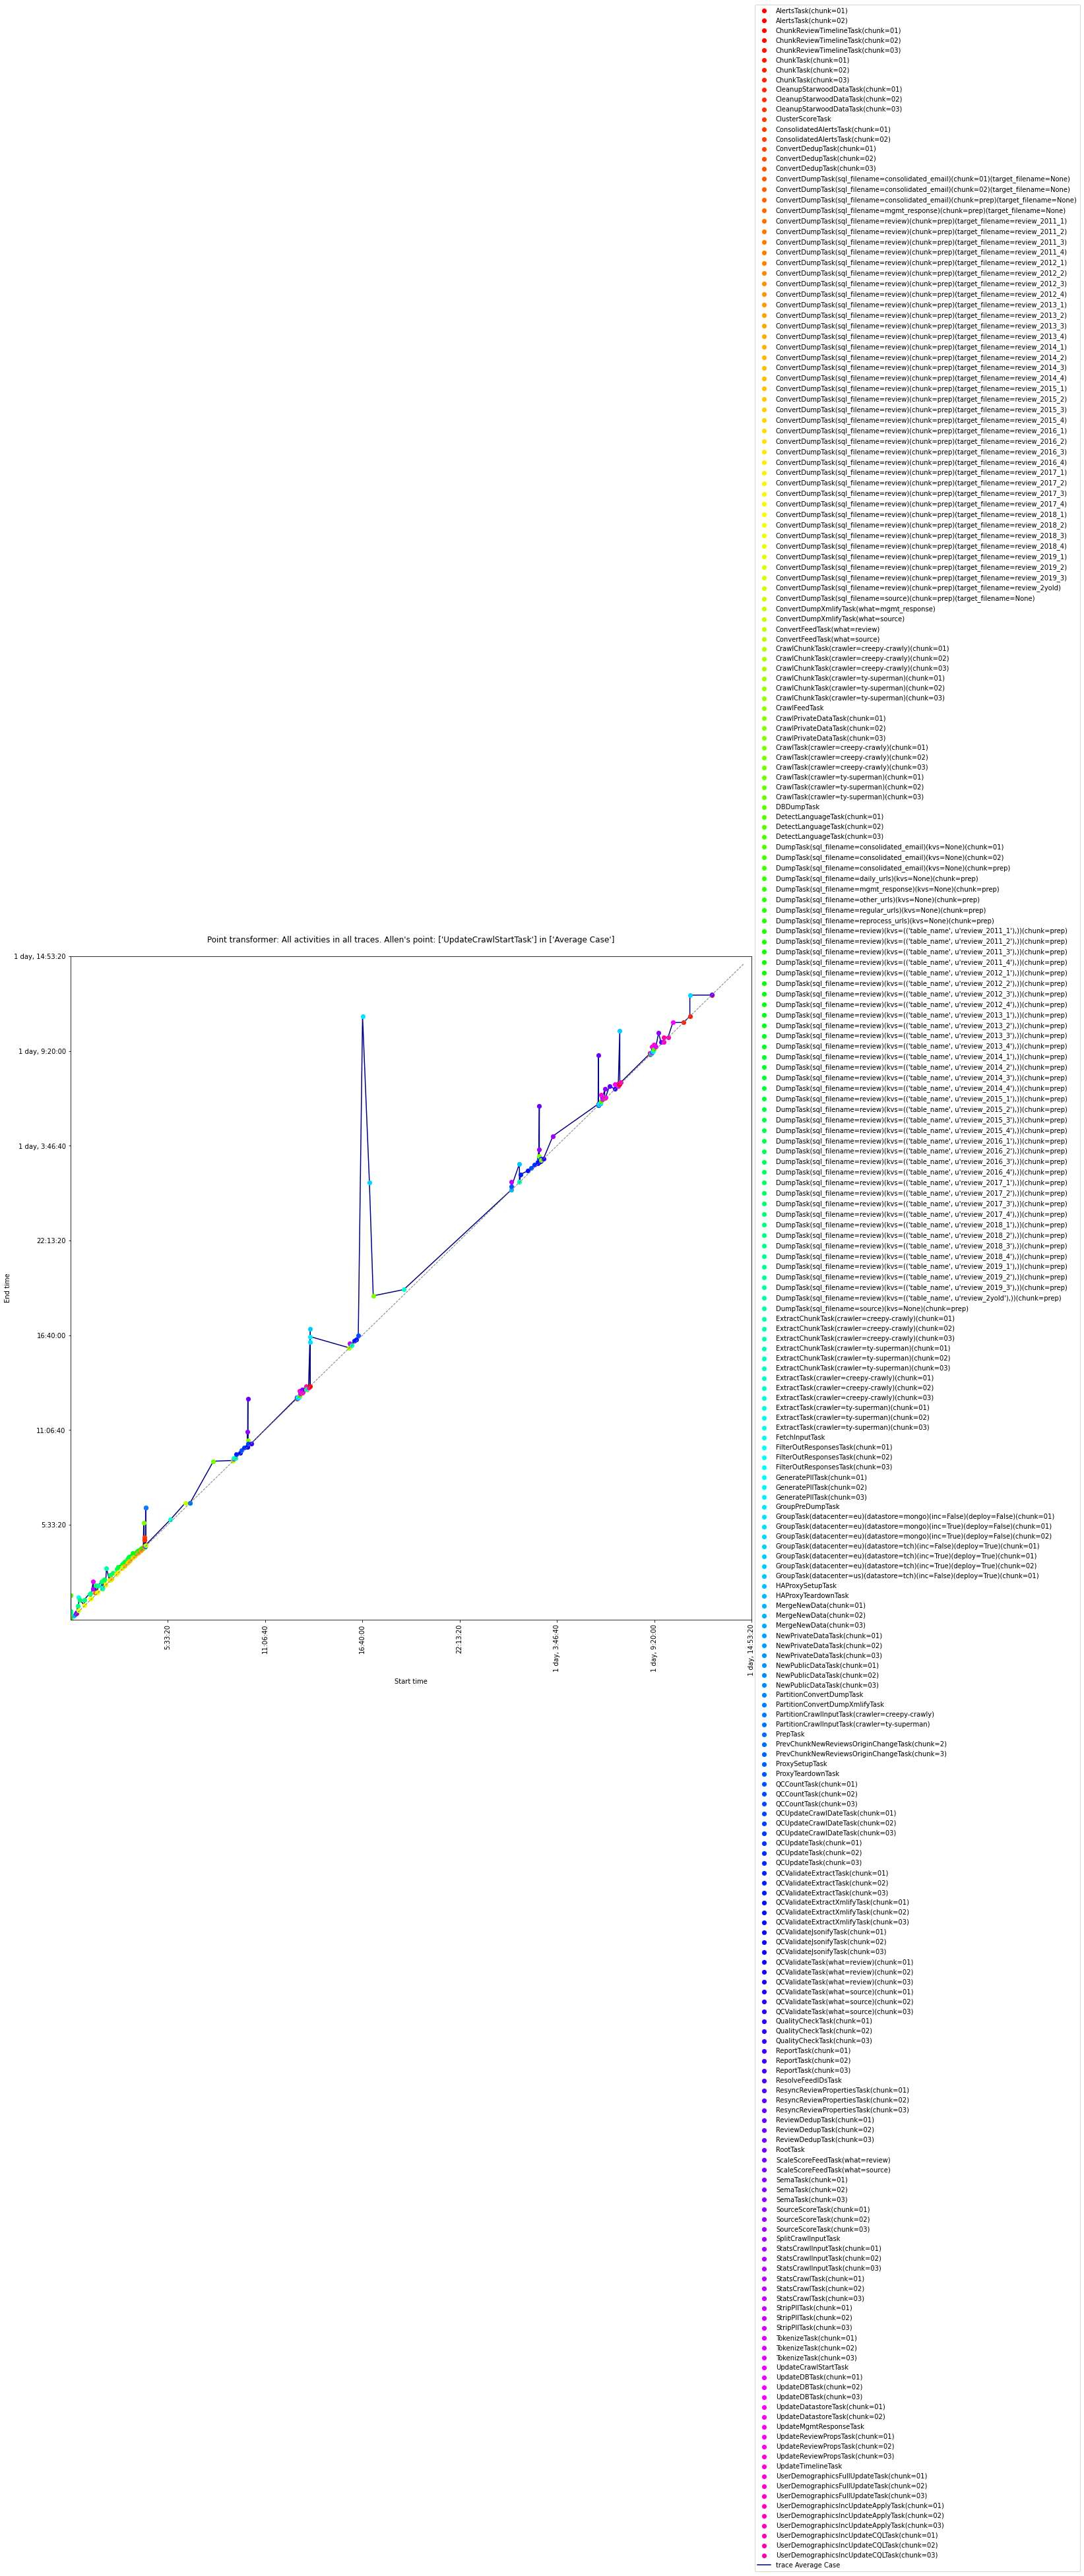

In [16]:
vis.plot_all_traces(average_trace_activities, show_plot=None)

In case only one subset of activities from the whole data set should be investigated

NOTE: This is specific to the 'daily.2019-0.csv' dataset

In [18]:
pd.set_option('display.max_colwidth', -1)

index_used=[[117,120]]
#Indexes used for produced 'graphs/avgActSlideSplit/' (to have an avg of 400 points per visualization)
#index_used=[[0,31],[21,51],[41,71],[61,91],[81,111],[87,117],
#            [101,119],[117,120],[118,122],[120,126],[123,156],
#            [139,170],[141,171],[170,178],[175,216],[206,246],[216,256]]

for indexes in index_used:
    #subset = appended[appended['activity'].str.startswith('ExtractTask') & appended['case']]
    subset = appended[appended['activity'].isin(average_trace_activities['activity'][indexes[0]:indexes[1]])]
    #subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]]) & ~appended['activity'].str.startswith('ExtractTask(crawler=creepy-crawly)(chunk')]

    output_prefix = LUIGI_LOG_PATH+'graphs/avgActSlideSplit/'+filename+'All_'+str(indexes[0])+'_'+str(indexes[1])+'act_'+str(len(subset))+'pts'
    #print(output_prefix)

output_prefix = LUIGI_LOG_PATH+'graphs/'+filename
print(output_prefix)
#snippet = vis.plot_all(subset, output_prefix)
subset = vis.get_relative_timestamps(subset, ['AllTasks'])
print('There are ', len(subset),'subset entries in the activities interval:',index_used[0])

subset.head()


/Users/andream/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


../datagraphs/daily.2019-July_September
There are  12102 subset entries in the activities interval: [117, 120]


case                                      activity  \
0    daily.2019-07-01_10-28-01  ExtractTask(crawler=creepy-crawly)(chunk=01)   
69   daily.2019-07-01_10-28-01  ExtractTask(crawler=creepy-crawly)(chunk=01)   
186  daily.2019-07-01_10-28-01  ExtractTask(crawler=creepy-crawly)(chunk=01)   
192  daily.2019-07-01_10-28-01  ExtractTask(crawler=creepy-crawly)(chunk=01)   
199  daily.2019-07-01_10-28-01  ExtractTask(crawler=creepy-crawly)(chunk=01)   

    rel_start  rel_end  num_start  num_end          start_time  \
0    0:00:00   0:06:54  0.0        414.0   2019-07-01 14:14:34   
69   0:01:24   0:06:50  84.0       410.0   2019-07-01 14:15:58   
186  0:06:16   0:14:03  376.0      843.0   2019-07-01 14:20:50   
192  0:06:29   0:14:09  389.0      849.0   2019-07-01 14:21:03   
199  0:06:41   0:13:15  401.0      795.0   2019-07-01 14:21:15   

               end_time  
0   2019-07-01 14:21:28  
69  2019-07-01 14:21:24  
186 2019-07-01 14:28:37  
192 2019-07-01 14:28:43  
199 2019-07-01 14:27:49

In [19]:
subset = excluding.copy() #Comment this out to only examine a certain snippet of the subset from above

## Compute Performance Skyline

In [21]:
skyline_points = vis.get_skyline_points(subset)
representative = skyline_points[['case','activity']].drop_duplicates()

print(len(subset),' points in total distributed among', len(subset['case'].unique()), 'cases\n\nInfo about the skyline:')
print('- ',len(skyline_points),'/',len(subset),'=', round(len(skyline_points)/len(subset)*100,2), '% events are part of a skyline')
print('- ',len(skyline_points['activity'].unique()),'/',len(subset['activity'].unique()),'=', round(len(skyline_points['activity'].unique())/len(subset['activity'].unique())*100,2), 'activities are part of a skyline.')
print('- ',len(representative),'/',len(skyline_points),'=', round(len(representative)/len(skyline_points)*100,2), '% unique activities on the skylines.') 
print("   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. ")

skyline_points.head()

12483  points in total distributed among 10 cases

Info about the skyline:
-  543 / 12483 = 4.35 % events are part of a skyline
-  62 / 253 = 24.51 activities are part of a skyline.
-  274 / 543 = 50.46 % unique activities on the skylines.
   'Unique' meaning there are no two points with the same 'activity' on the skyline of the same trace. 


num_start  num_end  \
0  764.0      1794.0    
1  764.0      1794.0    
2  764.0      4542.0    
3  764.0      4542.0    
4  764.0      4542.0    

                                                      activity  \
0  CrawlFeedTask                                                 
1  DumpTask(sql_filename=other_urls)(kvs=None)(chunk=prep)       
2  DumpTask(sql_filename=regular_urls)(kvs=None)(chunk=prep)     
3  ProxySetupTask                                                
4  DumpTask(sql_filename=reprocess_urls)(kvs=None)(chunk=prep)   

                        case  
0  daily.2019-07-01_10-28-01  
1  daily.2019-07-01_10-28-01  
2  daily.2019-07-01_10-28-01  
3  daily.2019-07-01_10-28-01  
4  daily.2019-07-01_10-28-01

## Stats by Case

In [22]:
all_by_case = subset.groupby('case').size().reset_index(name='total_points_in_case').sort_values(by=['total_points_in_case'], ascending=False)
skyline_by_case = skyline_points.groupby('case').size().reset_index(name='skyline_points_in_case').sort_values(by=['skyline_points_in_case'], ascending=False)
r_by_case = representative.groupby('case').size().reset_index(name='unique_skyline_activities_in_case').sort_values(by=['unique_skyline_activities_in_case'], ascending=False)
by_case = r_by_case.merge(skyline_by_case, on='case', how='inner')
#all_by_case.plot.hist(bins=8, alpha=0.5)

all_by_activity = subset.groupby('activity').size().reset_index(name='total_points_per_activity').sort_values(by=['total_points_per_activity'], ascending=False)
all_by_activity['total_points_per_activity']=all_by_activity.apply(lambda row: round(row['total_points_per_activity']/50), axis=1)

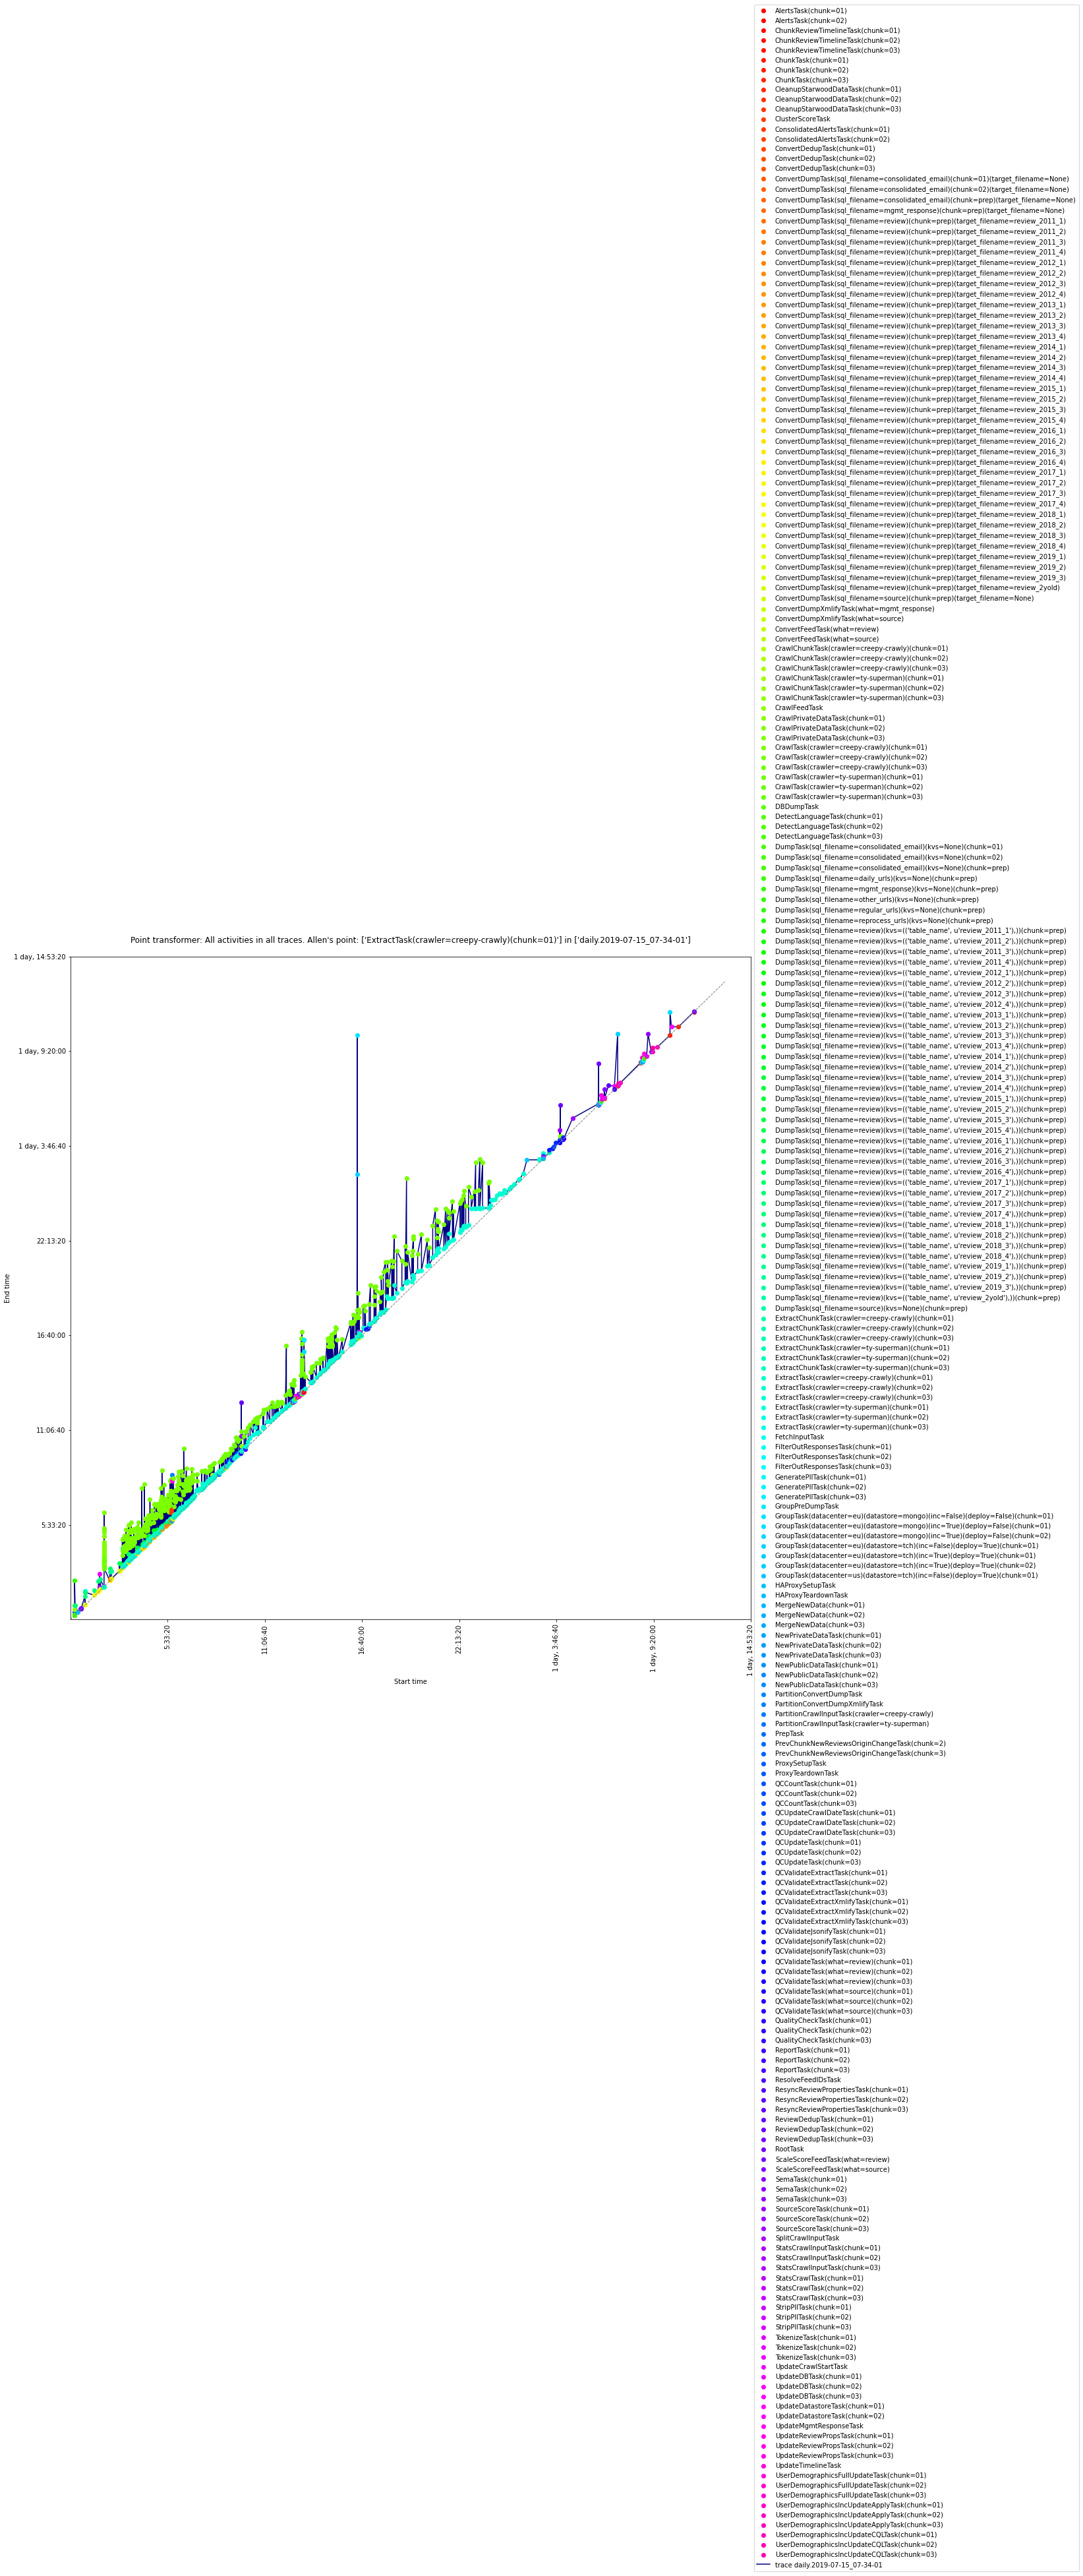

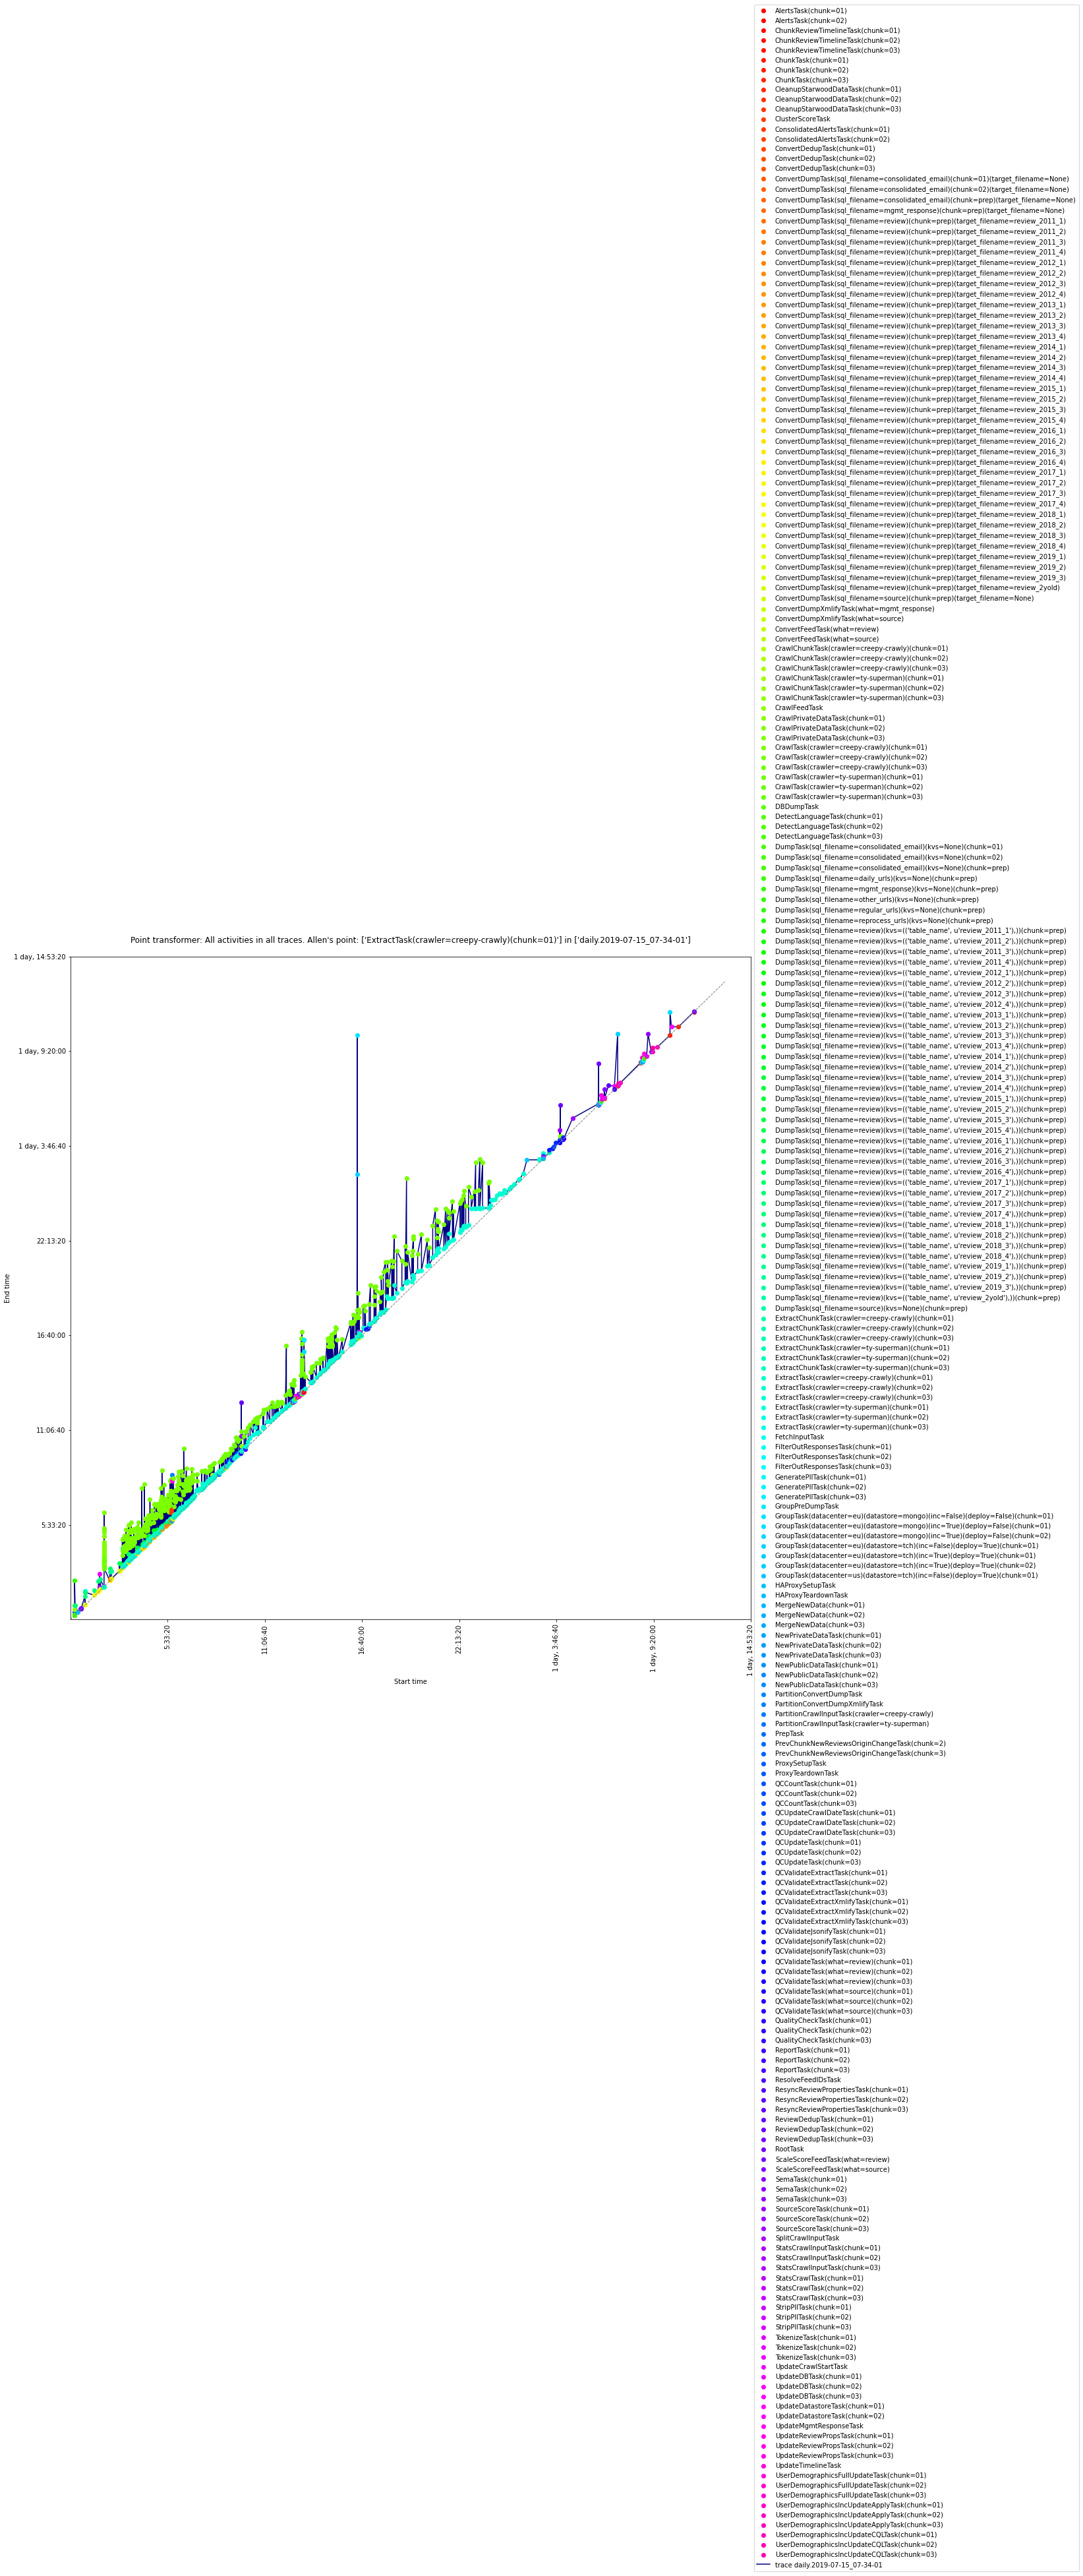

In [24]:
vis.plot_all_traces(subset[subset['case']==subset['case'].unique()[9]], show_plot=1)

In [25]:
merged_by_case = by_case.merge(all_by_case)[['case','total_points_in_case','skyline_points_in_case', 'unique_skyline_activities_in_case']].sort_values(by=['total_points_in_case'], ascending=False)
merged_by_case['skyline_percentage'] = merged_by_case.apply(lambda row: round(row['skyline_points_in_case']/row['total_points_in_case']*100,2), axis=1)
merged_by_case['unique_percentage'] = merged_by_case.apply(lambda row: round(row['unique_skyline_activities_in_case']/row['skyline_points_in_case']*100,2), axis=1)
print('Expectation/Averages: \ntotal_points_in_case:\t\t\t',round(merged_by_case['total_points_in_case'].mean(),2))
print('skyline_points_in_case:\t\t\t',round(merged_by_case['skyline_points_in_case'].mean(),2))
print('unique_skyline_activities_in_case:\t',round(merged_by_case['unique_skyline_activities_in_case'].mean(),2))
print('skyline_percentage:\t\t\t',round(merged_by_case['skyline_percentage'].mean(),2))
print('unique_percentage:\t\t\t',round(merged_by_case['unique_percentage'].mean(),2))
merged_by_case.head()

Expectation/Averages: 
total_points_in_case:			 1248.3
skyline_points_in_case:			 54.3
unique_skyline_activities_in_case:	 27.4
skyline_percentage:			 4.35
unique_percentage:			 51.33


case  total_points_in_case  skyline_points_in_case  \
4  daily.2019-07-13_21-50-01  1251                  61                       
2  daily.2019-07-07_16-38-01  1249                  62                       
3  daily.2019-07-12_08-18-01  1249                  55                       
9  daily.2019-07-06_03-28-02  1249                  64                       
0  daily.2019-07-04_14-27-01  1248                  59                       

   unique_skyline_activities_in_case  skyline_percentage  unique_percentage  
4  28                                 4.88                45.90              
2  31                                 4.96                50.00              
3  28                                 4.40                50.91              
9  20                                 5.12                31.25              
0  33                                 4.73                55.93